# Estatística

Definição: 
<p>==campo: prática e estudo de coleta e análise de dados;</p>
<p>==estatística resumida: fato ou resumo de um conjunto de dados;</p>

## Ramos da estatística
<p>Descritiva: descrever e resumir dados</p>
<p>Inferencial: usa dados de uma amostra para fazer inferências da população</p>

## Tipos de dados
<p>Numéricos (quantitativo)</p>
<p>Contínuo (medido)</p>
<p>Discreto (contado)</p>
<p>Categóricos (qualitativo)</p>
<p>Ordenável ou não</p>

## Medidas Centrais
Média, mediana e moda

In [ ]:
import numpy as np

np.mean(list) # média
np.median(list) # mediana

import statistics
statistics.mode(list) # moda


# filter and fetch centrals:
df[df['column1']=='Filter']['variable'].agg([np.mean,np.median])
    # usar a mediana: menos sensíveis a outliers; em caso de distribuição distorcida (apresenta cauda) para a direita ou para a esquerda, a mediana representa melhor.




## Espalhamento

In [ ]:
# VARIÂNCIA
dists = df['column'] -  np.mean(df['column']) # broadcast
var = np.sum(dists**2)/(len(df['column'])-1)
# esse -1 no denominador é usado para retirar um grau de liberdade;

# ou:
np.var(df['column'], ddof=1) #ddof: delta degree of freedom; em amostra ddof=1; em população ddof=0 (default).

In [ ]:
# DESVIO PADRÃO
np.sqrt(var) # raiz quadrada da variância

np.std(df['column'], ddof=1)

In [ ]:
# DESVIO ABSOLUTO MÉDIO
np.mean(np.abs(dists))# média do módulo das distâncias à média
    # diferença do padrão: padrão usa quadrado, que penaliza mais desvios maiores. absoluto penaliza igual.

## Quantis

- Assim como a mediana, divide os dados em partes de mesmo tamanho.

In [ ]:
# definindo quantis:
np.quantile(df['column'], 0.5) # mediana; retorna o valor que divide
np.quantile(df['column'], 0.25) # primeiro quartil
np.quantile(df['column'], 0.75) # terceiro quartil
np.quantile(df['column'], 0) # mínimo
np.quantile(df['column'], 1) # máximo


In [14]:
# boxplot:
import matplotlib.pyplot as plt

plt.boxplot(df['column'])
plt.show()

NameError: name 'df' is not defined

In [ ]:
# dividir os dados em 5 partes iguais: quintis
np.quantile(df['column'], [0,0.2,0.4,0.6,0.8,1])

# ou 
np.quantile(df['column'], np.linspace(0, 1, 5))
# np.linspace(start, stop, num) # cria conjunto de pontos na reta real, começando por start e terminando em stop; divididos em num intervalos

In [ ]:
# medida IQR (inter-quartile range): distância entre o primeiro e terceiro quartil:
np.quantile(df['column'], 0.75) - np.quantile(df['column'], 0.25) 
# ou:
from scipy.stats import iqr
iqr(df['column'])


In [ ]:
# Outliers: ponto substancialmente diferente dos demais
    # critério: diferença substancial = 1,5xIQR do primeiro ou terceiro quartil.
lower_threshold = np.quantile(df['column'], 0.25) - 1.5 * iqr
upper_threshold = np.quantile(df['column'], 0.75) + 1.5 * iqr

df[(df['column'] < lower_threshold) | (df['column'] > upper_threshold)]

In [ ]:
# todas as estatísticas supracitadas:
df['column'].describe()

# Probabilidade

P(A) = <sup>Number of favorable outcomes</sup> / <sub>Total number of possible outcomes</sub>


In [ ]:

# fixar random seed:ponto de partida de gerador de números aleatórios = todos os sorteios "aleatórios" darão o mesmo resultado se rodados novamente.
np.random.seed(10)

# sortear um elemento de dataframe:
df.sample()
# sortear dois elementos de dataframe (sem reposição):
df.sample(2)
# sortear dois elementos de dataframe (com reposição):
df.sample(2, replace=True) # pode repetir registros; cada sorteio é um evento independente

### Distribuição probabilistica
- Função que descreve a probabilidade de diferentes eventos em um evento aleatório.
- Atribui probabilidade a todos os resultados possíveis.

#### Distribuição discreta:
- a variável é discreta (valor inteiro ou categoria nominal) = contável


##### Visualização:
- barplot com os resultados no eixo x e a frequência no eixo Y.
- A probabilidade será a área da região na distribuição de probabilidade
- no rolar de um dado D6 não viciado, serão seis barras de largura 1 e altura 1/6. = DISTRIBUIÇÃO UNIFORME
- no rolar de um dado D6 com uma face 3 no lugar da 2, serão quatro barras de altura 1/6, uma de altura 0 (2) e uma de 1/3 (3).

##### valor esperado = média da probabilidade de distribuição
- Soma(valor * sua probabilidade)
- Quanto maior a amostra, mas próximo do valor esperado (média teórica) é a média dos resultados -> "Lei dos Grandes Números"

In [ ]:
# value_counts() é rei aqui

#### Distribuição contínua
- Resultados são numéricos mas não contáveis.
- Probabilidade continua sendo a área
- Não teremos mais a probabilidade de um resultado específico porque ela será zero (Área é zero)
- Mas teremos a probabilidade de ser menor, maior que um valor.


##### distribuição uniforme: linha horizontal na distribuição.
- Exemplo: tempo de espera de um ônibus.


In [ ]:
from scipy.stats import uniform
uniform.cdf(7,0,12) # probabilidade de ser menor que sete, resultados possíveis de 0 a 12.
1 - uniform.cdf(7,0,12) # probabilidade de ser maior que sete, resultados possíveis de 0 a 12.
uniform.cdf(7,0,12) - uniform.cdf(4,0,12) # probabilidade de ser entre 4 e 7



# gerar 10 números aleatórios no range 0,12:
samples = uniform.rvs(0,5, size=10)
plt.hist(samples)
plt.show()


##### distribuição binomial: 
- Definição: distribuição de probabilidade que representa o número de sucessos (dois resultados possíveis) de uma ou várias tentativas independentes.
- Exemplo: número de caras ao jogar X moedas
- Distribuição discreta, contável

- Descrita por dois parâmetros: n e p
    - n: número de tentativas
    - p: probabilidade do sucesso

In [1]:
# SIMULANDO:
from scipy.stats import binom

# binom.rvs(# of coins, probability of heads/success, size=# of trials)
# binom.rvs(# of coins, p, n)

binom.rvs(1,0.5,size=1) # jogar uma moeda honesta uma vez

binom.rvs(1,0.5,size=8) # uma moeda oito vezes
binom.rvs(8,0.5,size=1) # oito moedas uma vez

# olhando para o retorno da simulação:
binom.rvs(8,0.5,size=3)  # retorna uma lista com cada evento (3), com o somatório de sucesso em cada (0 a 8)


array([2, 3, 5], dtype=int64)

In [2]:
# PROBABILIDADE:
#P(heads=7) :binom.pmf(#heads,#trials,#prob.heads)
binom.pmf(7,10,0.5)

0.11718749999999999

In [3]:
#P(heads<=7):
binom.cdf(7,10,0.5)

0.9453125

In [4]:
#P(heads>7) 
1-binom.cdf(7,10,0.5)

0.0546875

In [ ]:
# valor esperado: soma(n*p) = 10 * 0,5 = 5

##### Distribuição normal
- Forma de sino;
- Propriedades:
    - Simétrica;
    - Área = 1 (como todas as distribuições contínuas);
    - Probabilidade nunca atinge 0.
- Descrita pela sua média e desvio padrão.
    - Se média = 0 e std = 1 -> Distribuição normal padrão.
- Áreas centrais:
    - limites: (média - um desvio, média + um desvio) = 68%
    - dois desvios = 95%
    - três desvios = 99,7%
- Vários dados da vida real apresental shape normal.

In [ ]:
from scipy.stats import norm
norm.cdf(154,161,7) # atributos: ponto (valor no eixo x), média, desvio // dfc indica probabilidade menor que o ponto (área até o ponto, saíndo da esquerda)

In [ ]:
# passando a área e procurando o ponto:
norm.ppf(0.9,161,7) # área até o ponto, média, desvio.
norm.ppf((1-0.9),161,7) # um menos área até o ponto = área depois do ponto 

In [ ]:
# gerando 10 amostras da distribuição:
norm.rvs(161,7, size =10) # média, desvio e número de amostras

### Teorema do limite central (CLT)

- A distribuição amostral se aproxima da normal conforme o número de tentativas aumenta.
- Se as amostras são randomicas e independentes.
- Vale pra média, desvio padrão e outras estatísticas 

In [8]:
# simulando lance de dados:
import pandas as pd
import numpy as np

die = pd.Series([1,2,3,4,5,6])
# rolling 5 times:
sampl_5 = die.sample(5, replace=True)
print(sampl_5)

np.mean(sampl_5) # a cada novo sorteio, terá um valor diferente de média.

2    3
3    4
0    1
3    4
1    2
dtype: int64


2.8

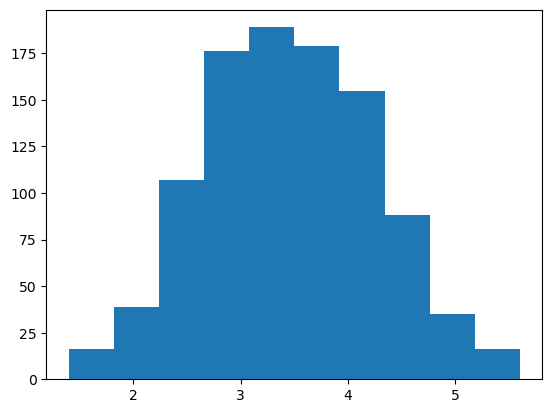

In [20]:
# jogando 5 dados e tirar a média -> 10 vezes -> tirar a média
sample_means = []
for i in range(10): # vá aumentando esse número acrescentando zeros
    sampl_5 = die.sample(5, replace=True)
    sample_means.append(np.mean(sampl_5)) # média das médias


plt.hist(sample_means) # a forma se aproxima da distribuição normal
plt.show()

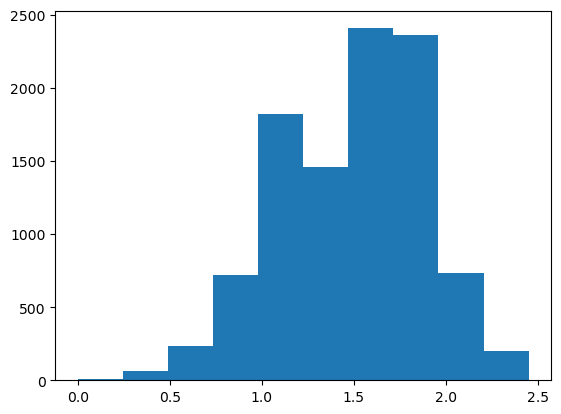

In [24]:
# jogando 5 dados e tirar a média -> 10 vezes -> tirar o desvio
sample_sds = []
for i in range(10000): # vá aumentando esse número acrescentando zeros
    sample_sds.append(np.std(die.sample(5, replace=True))) # média das médias


plt.hist(sample_sds) # a forma se aproxima da distribuição normal com centro em 1.9
plt.show()

##### Proporções e o teorema

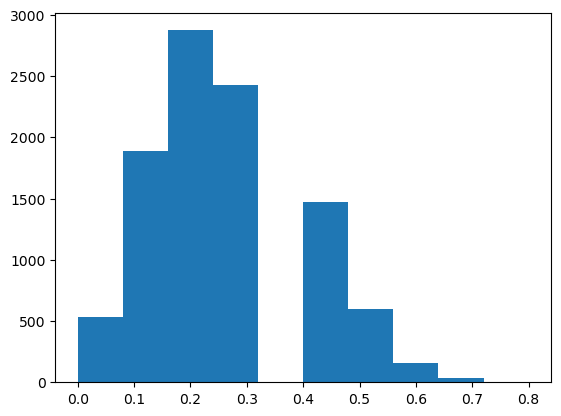

In [43]:
# amostra de equipe de vendas:
sales_team = pd.Series(['Lucas', 'Thiago', 'Luiz', 'Mariana'])

# calculando a média das ocorrências de 'Lucas' numa amostra de tamanho 10, tirada n vezes
sample_count = []
for i in range(10000): # vá aumentando esse número acrescentando zeros
    sample_count.append((sales_team.sample(10, replace=True) == 'Lucas').mean()) 

plt.hist(sample_count) # a forma se aproxima do valor esperado de 0,25
plt.show()

# ao se ter dificuldade de determinar métricas da população, pode-se usar o teorema do limite central

## Distribuição de Poisson

- Antes:

### Processo de Poisson

    - eventos que acontecem a uma taxa fixa, mas completamente ao acaso.
    - probabilidade de um número de eventos de ocorrer em um período
        - Exemplo: número de animais adotados por semana é oito (lambda=8), porém dentro da semana as adoções podem acontecer variadamente
            - Número de terremotos no Japão, número de pessoas em restaurante por hora.
    - A unidade do tempo não importa, desde que seja mantida a mesma para as probabilidades.

- lambda: representa o número médio de eventos por período de tempo. Altera a distribuição, mas o pico é sempre no lambda.
- Não é contínua.


In [45]:
from scipy.stats import poisson

# Probabilidade de uma semana com cinco, com lambda oito: P(#adoptions in a week = 5)
poisson.pmf(5,8) 

0.09160366159257921

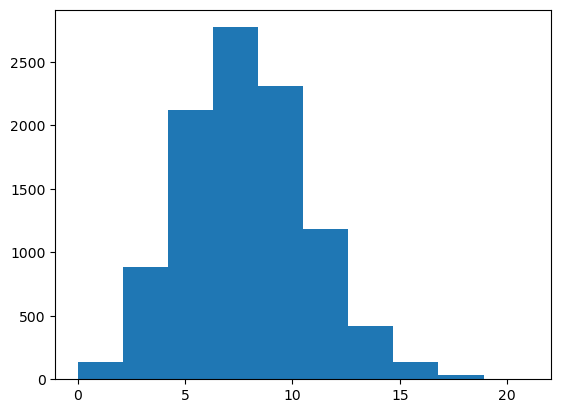

In [50]:
# P(#adoptions in a week <= 5)
poisson.cdf(5,8) 
# P(#adoptions in a week > 5)
1-poisson.cdf(5,8) 
# lambda=10 P(#adoptions in a week > 5)
1-poisson.cdf(5,10) 

# amostras de pontos da distribuição de poission:
poisson.rvs(8,size=10) # lambda=8, 10 amostras

# CLT aplies:
plt.hist(poisson.rvs(8,size=10000))
plt.show()

# Outras distribuições

# Exponencial
- probabilidade de tempo entre dois eventos Poisson.
- Exemplos:
    - Probabilidade de > 1 dia entre dois eventos
- Também usa lambda (rate)
- É contínua, diferente da Poisson.


In [52]:
# exemplo: um ticket emitido a cada dois minutos: lambda=0.5 tickets por minuto:
    # em termos de tempo (exponencial): 1/lambda = 1/2; média de 2 minutos pra um pedido
from scipy.stats import expon

# P(wait<1 min); lambda=0.5
expon.cdf(1, scale=0.5)

# P(wait>3 min); lambda=0.5
1 - expon.cdf(3, scale=0.5)

# P(1 min < wait < 3 min); lambda=0.5
expon.cdf(3, scale=0.5) - expon.cdf(1, scale=0.5)

0.0024787521766663767

# (Student's) t-distribuição
- semelhante à normal, mas não igual -> é mais abatida, tem mais probablidade de distanciar da média.
- descrita também por seus graus de liberdade; quanto mais alto, menor o desvio padrão e mais próxima da normal

# log-normal
- log(x) com x sendo distribuição normal
- assimétrica
- exemplos: pressão arterial em adultos, duração de um jogo de xadrez, hospitalizações em surto de SARS em 2003

# Correlação

- Relação entre variáveis: quando existe, denominamos uma variavel independente/esplanatória e a outra dependente/de resposta
- Correlação não implica causalidade;

## Coeficiente de correlação.
- Varia entre -1 e 1;
- Seu módulo indica força da correlação;
- Sinal indica a direção da relação (direta ou inversa);



##### Correlação Linear

In [ ]:
# visualização 
import seaborn as sns
sns.scatterplot(x="column1", y="column2", data=df)
plt.show()

In [ ]:
# scatter com linha de tendência
sns.lmplot(x="column1", y="column2", data=df,ci=None) # ci=None: sem margwem de intervalo de confiança ao redor da linha
plt.show()

In [ ]:
# calculando correlação: pelo método "r" ou "Pearson de correlação produto-momento (Pearson product-moment correlation)"
df["column1"].corr(df["column2"])

### Fórmula de r

$r = \frac{n\sum\limits_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{n\sum\limits_{i=1}^{n}(x_i - \bar{x})^2}\sqrt{n\sum\limits_{i=1}^{n}(y_i - \bar{y})^2}}$


- no numerador, a distância de um ponto da média em x vezes mesma coisa em y;
- no denominador: desvio padrão de x vezes o de y

##### Correlação não - Linear

- Assim como a regressão linear, a correlação exige uma relação linear. 
- Quando a relação não é linear, pode haver uma relação a uma transformada de uma ou ambas variáveis

In [ ]:
# log transformation:
np.log(df["column1"]) # pode haver essa correlação 

# Quadrática:
sqrt(df["column1"])

# transformação reciproca:
1 / df["column1"]

# Design de experimetno

- Busca responder: qual o efeito do tratamento na resposta?
- Tratamento: variável independente;
- Resposta: variável dependente.
- Exemplo: Qual o efeito de propaganda no número de vendas?

- Experimento controlado: participantes divididos em dois grupos: grupo de tratamento e grupo de controle (não recebe o tratamento);
- Os grupos devem ser comparáveis, e por essa comparação podemos obter viés/bias e confusões (aquelas variáveis intermediárias que causam correlações expúrias)
    - Exemplo: idade média dos grupos (se forem diferentes, podem causar viés na comparação no caso do exemplo supracitado)

- Gold standard dos experimentos: técnica para reduzir viés
    - Estudo controlado randomizado (sorteio da divisão em grupos);
    - Placebo: faz acreditar que o grupo de controle está recebendo tratamento;
    - Experimento duplo-cego: o administrador do tratamento não sabe se o sujeito é do grupo de controle ou de tratamento (previne viés na resposta e análise);

### Estudo observacional

- Participanetos não são associados a grupos, mas associam-se eles mesmos baseados em características pré-existentes;
    - Ajuda a responder perguntas que nã conduzem a um experimento controlado;
    - Exemplo: não se pode forçar alguema fumar para testar efeito de algo em fumantes e não fumantes.
    - Por não ter como garantir que os grupos serão comparáveis em todos os aspectos, este estudo sõ pode afirmar associações e não causalidades.
    - Efeitos podem ser confundidos com fatores que selecionaram o indivíduo ao grupo que pertence.

#### Estudo longitudinal vs. Cross-sectional

- Longitudinal: participantes são seguidos por um tempo para examinar o efeito do tratamento na resposta.

- Transversal: dados dos participantes são coletados no mesmo instante;
- Mais sensível a confusões